he Project Data is Supermarket Sales Analysis. The Supermarket Sales data can be downloaded from the link. https://www.kaggle.com/aungpyaeap/supermarket-sales

# The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.*

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline

Downloading and reading the Open source Dataset from kaggle of supermarket sales

In [ ]:
#Reading the CSV dataset
data = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [ ]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Displays the first 10 entries of the dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Data Exploration/ Analysis
Exploring the given data(viewing the data,checking info,Checking for null values,Feature Conversion,Correlation etc.)

In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#The describe() method returns description of the data in the DataFrame.
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
#prints information about the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#value_counts() function returns object containing counts of unique values.
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

In [ ]:
#denote the lengths of the corresponding array dimension
data.shape

(1000, 17)

In [ ]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
#count the number of missing values in each row and column by calling sum() from the result of isnull()
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#isnull().any() will work for a DataFrame object to indicate if any value is missing
data.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

Data visualization

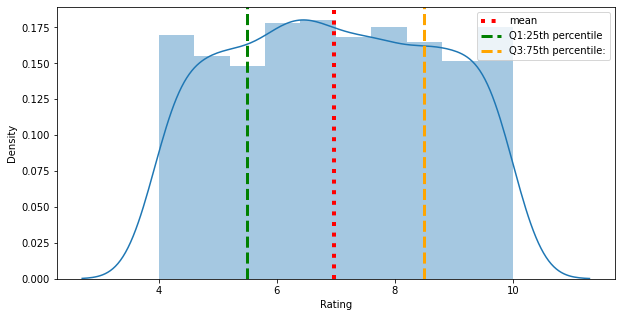

In [ ]:
#What does the customer rating look like and is it skewed?
plt.figure(figsize=(10,5))
sns.distplot(data.Rating)
plt.axvline(x=data.Rating.mean(),label='mean',color='red', linestyle='dotted',lw=4)
plt.axvline(x=np.percentile(data['Rating'],25),label = 'Q1:25th percentile',color='green', linestyle='dashed',lw=3)
plt.axvline(x=np.percentile(data['Rating'],75),label = 'Q3:75th percentile:',color='orange', linestyle='dashed',lw=3 )
plt.legend()
plt.show()


The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th quartiles respectively.The mean rating is ~7 across products.

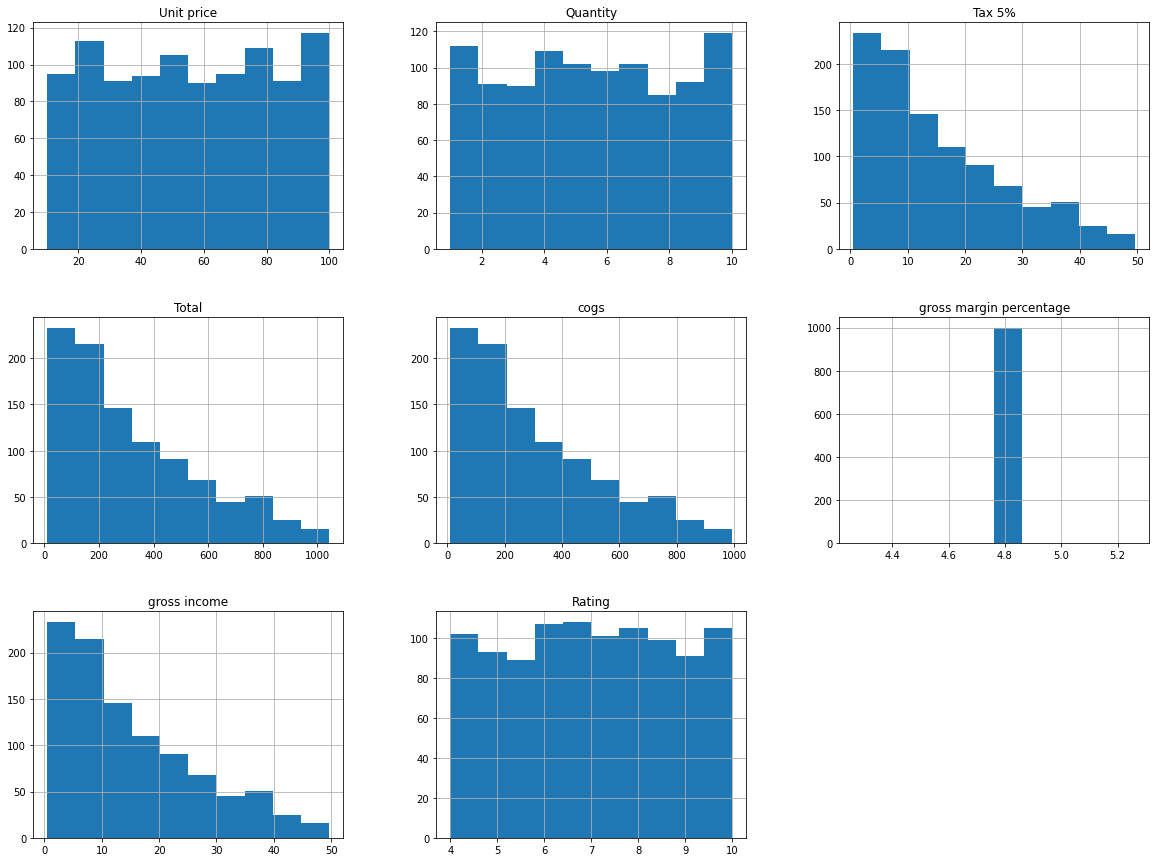

In [ ]:
data.hist(figsize=(20,15))
plt.show()

In [ ]:
#The corr() method finds the correlation of each column in a DataFrame.
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


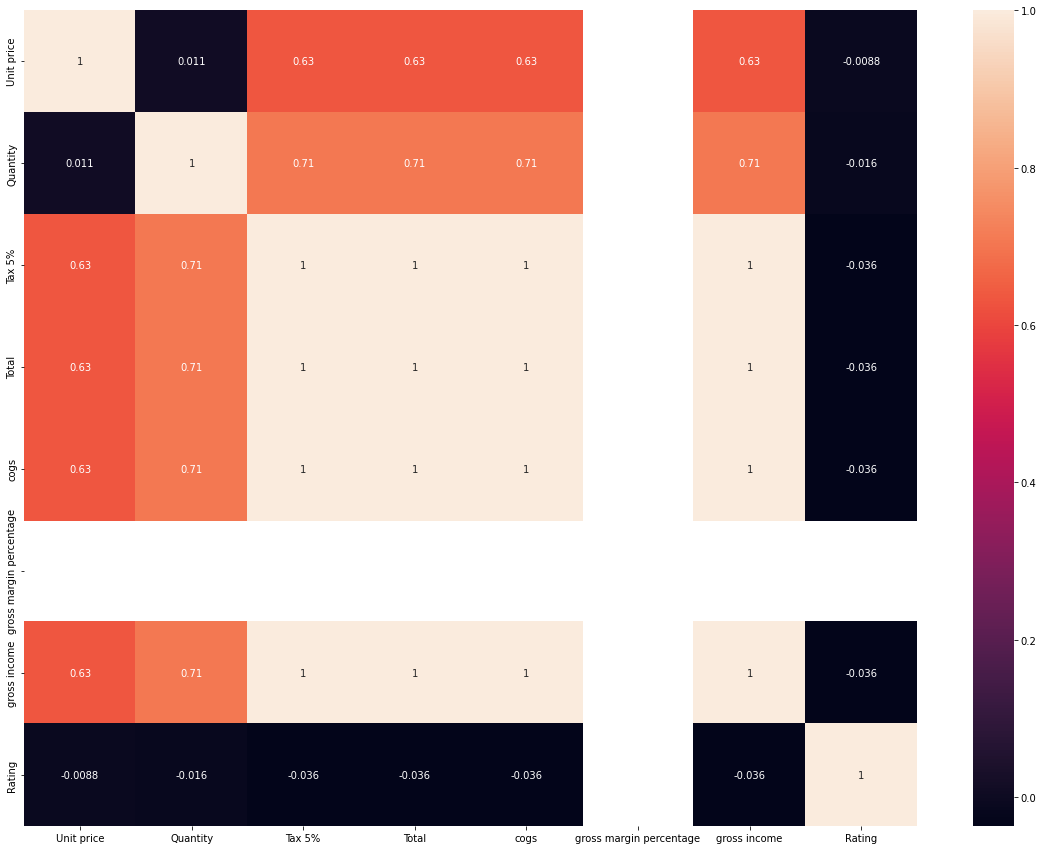

In [ ]:
plt.figure(figsize = (20,15))
# call upon the seaborn heatmap using sns.heatmap() and passing in the correlation matric ( corr).
sns.heatmap(data.corr(), annot =True)

As you can see, unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables.As is obvious, Quantity and gross income has very high correlation of 70%

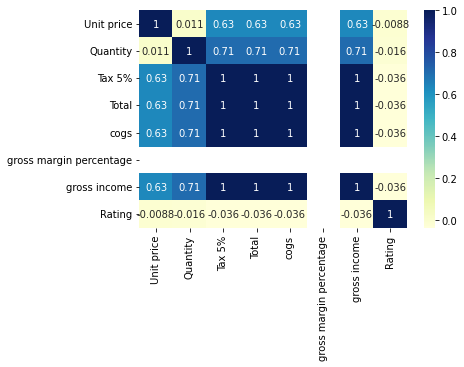

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()


There is a high positive correlation between the gross income and total as well as gross income and quantity
There are no corelated variables with Rating. if we choose Rating as a target variable it effects our model performance.



BOXPLOT

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

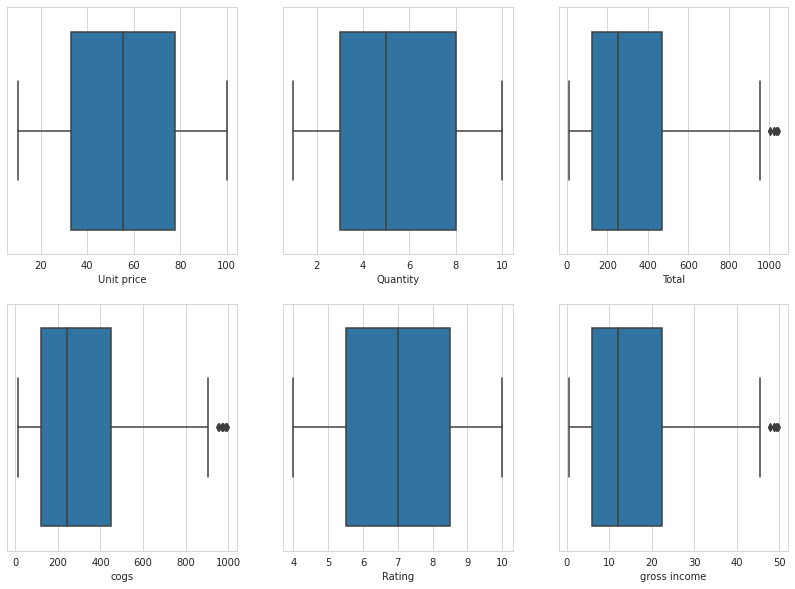

In [ ]:
#plotting the box plot for the dataset parameters

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

PAIRPLOT

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

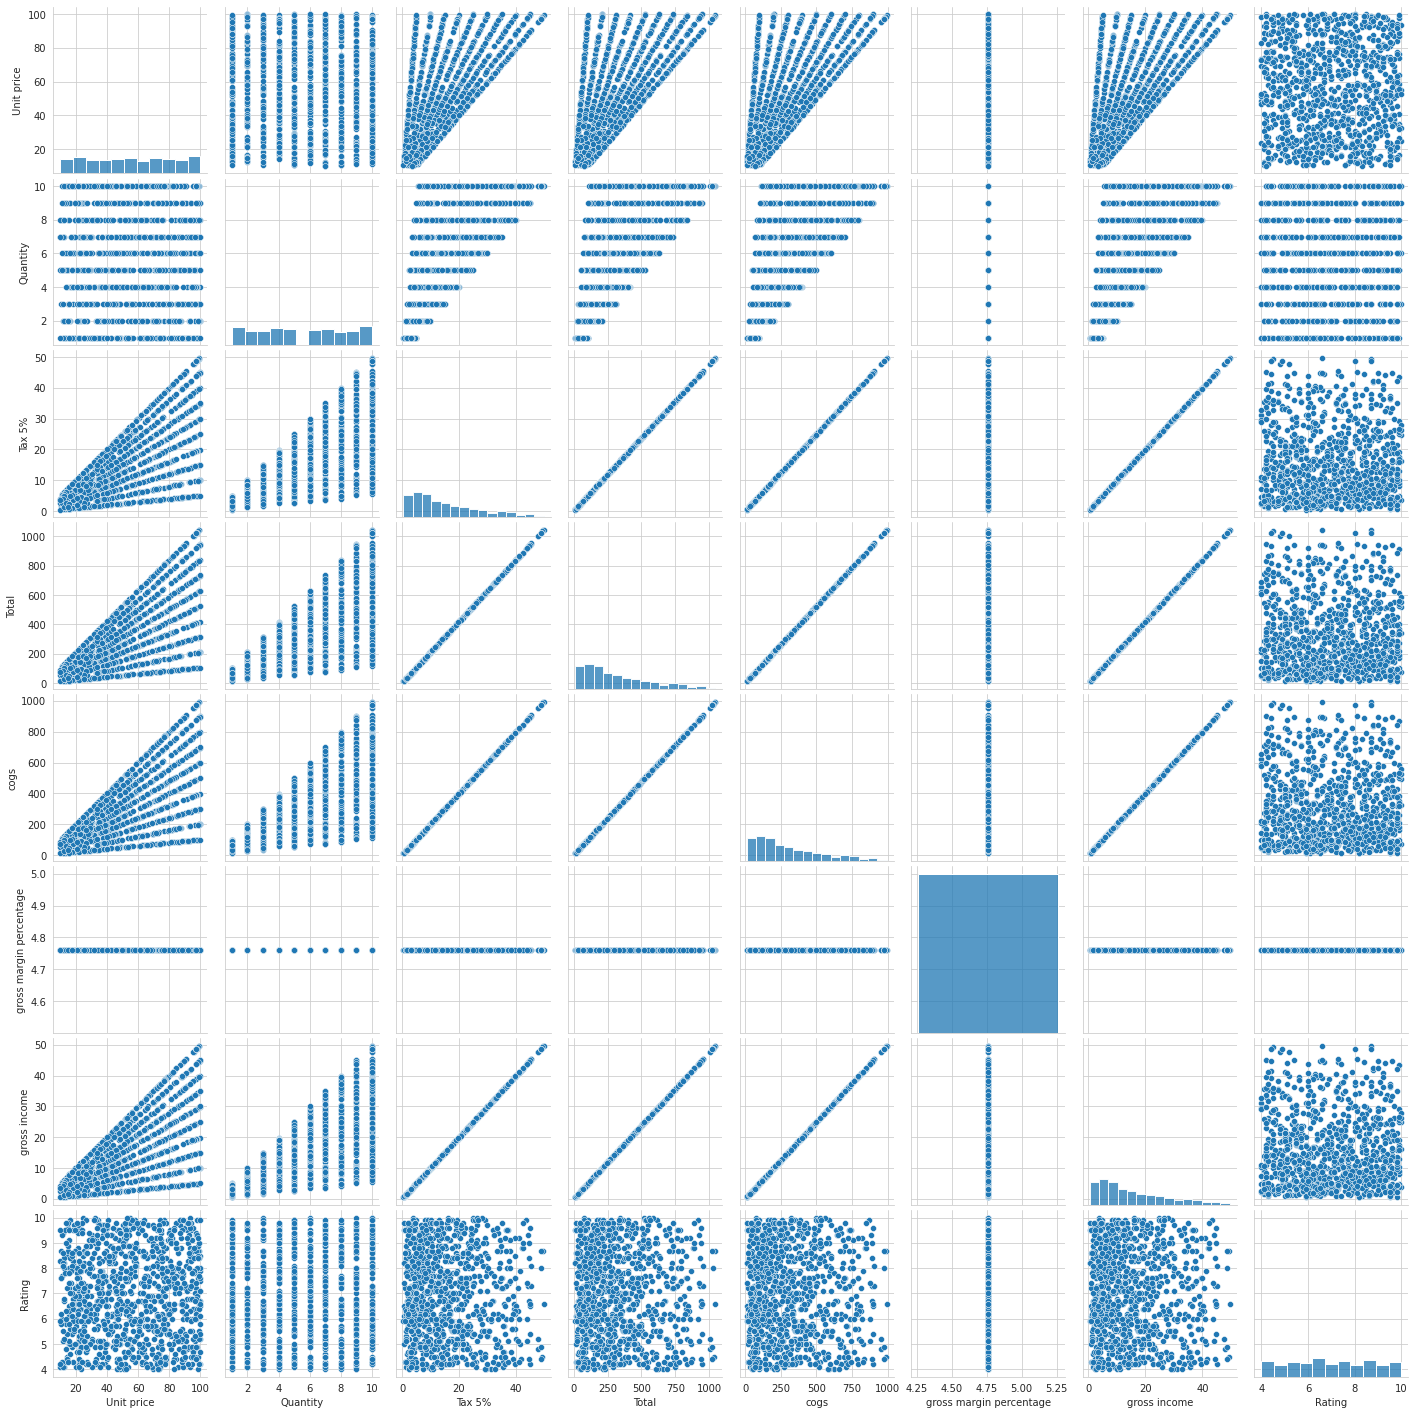

In [ ]:
sns.pairplot(data=data)

SCATTER PLOT

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

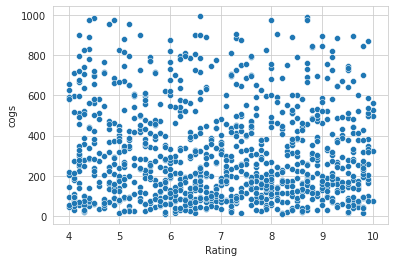

In [ ]:
sns.scatterplot(x='Rating', y= 'cogs', data=data)

JOINTPLOT

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

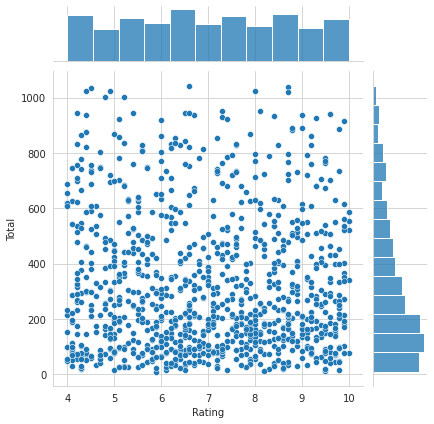

In [ ]:
sns.jointplot(x='Rating', y= 'Total', data=data)

CATPLOT

Catplot is a relatively new addition to Seaborn that simplifies plotting that involves categorical variables

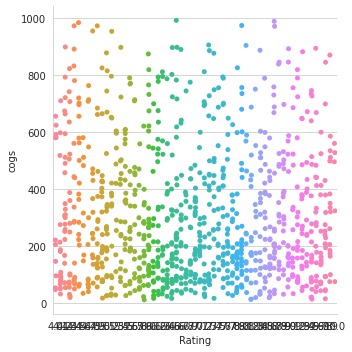

In [ ]:
sns.catplot(x='Rating', y= 'cogs', data=data)

Does gross income affect the ratings that the customers provide?

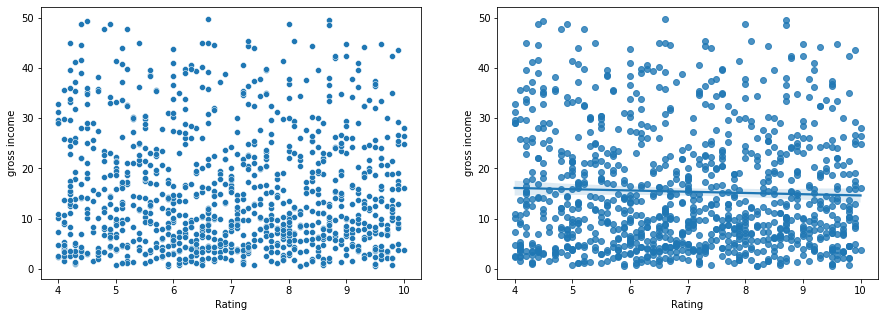

In [ ]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(15,5))
sns.scatterplot(ax=axes[0], x=data['Rating'], y=data['gross income'])
sns.regplot(ax=axes[1], x=data['Rating'], y=data['gross income'])
plt.show()

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between gross income of a customer and his rating.

Which product line generates most income?

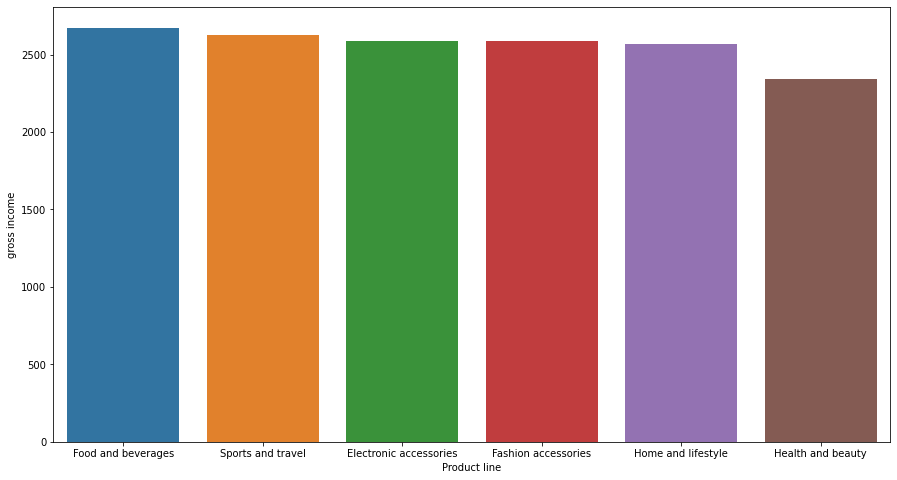

In [ ]:
cat=data[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum()
cat_sort=cat.sort_values(by='gross income', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x='Product line', y='gross income', data=cat_sort)
plt.show()

In [ ]:
data.groupby('Product line')['gross income'].sum()

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

Gross income is highest in Food and beverages.

KDE PLOT (DENSITY PLOT)

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

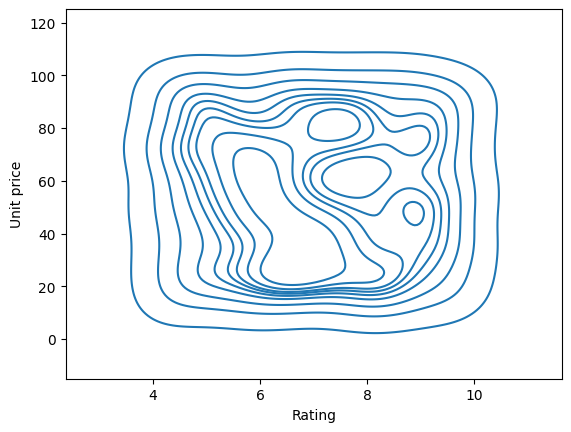

In [ ]:
plt.style.use("default")

sns.kdeplot(x='Rating', y= 'Unit price', data=data)

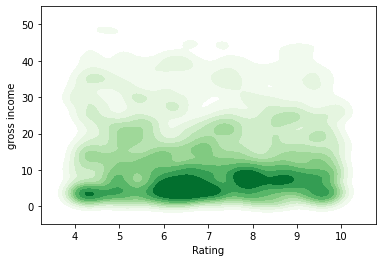

In [ ]:
sns.kdeplot(data['Rating'], data['gross income'], cmap="Greens", shade=True, bw=.15)

Text(0.5, 1.0, 'gross income vs. gross margin percentage')

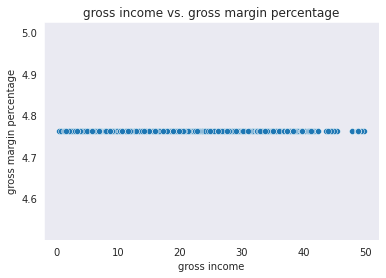

In [ ]:
sns.scatterplot(x='gross income', y='gross margin percentage', data=data, palette='Set1')
plt.title('gross income vs. gross margin percentage')

Text(0.5, 1.0, 'gross income vs. Tax')

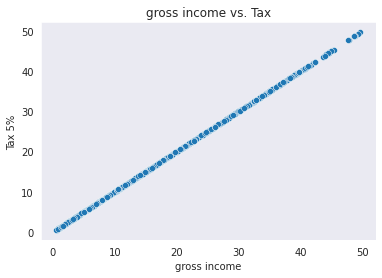

In [ ]:
# using discrete color scheme
sns.scatterplot(x='gross income', y='Tax 5%', data=data, palette='Set1')
plt.title('gross income vs. Tax')

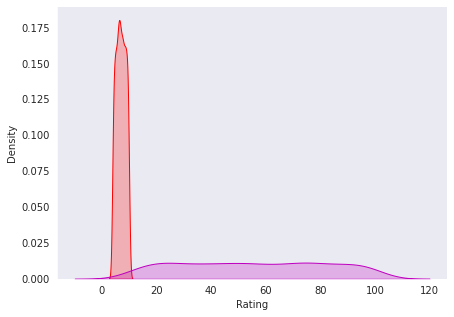

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.kdeplot(data['Rating'], shade=True, color='r')
sns.kdeplot(data['Unit price'], shade=True, color='m')
plt.show()

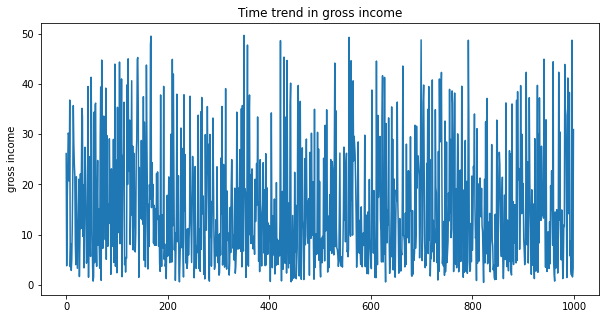

In [ ]:
#No particular time trend except for some days the gross income is pretty high and
#some days it is pretty low. Overall it remains at a certain average level.

plt.figure(figsize=(10,5))
sns.lineplot(x= data.groupby(data.index).mean().index, y = data.groupby(data.index).mean()['gross income'])
plt.title("Time trend in gross income")
plt.show()

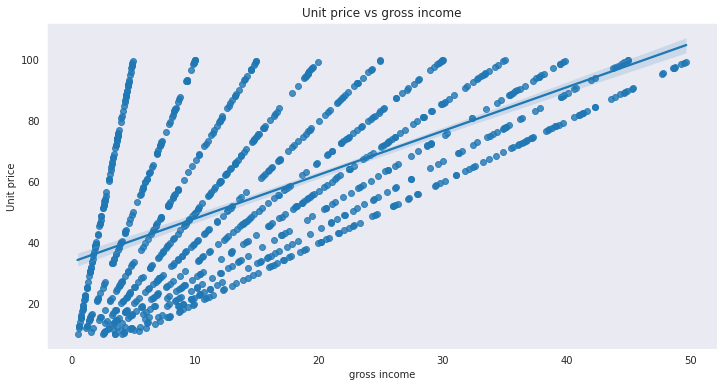

In [ ]:
#Finding the relation between Unit price and gross income
plt.figure(figsize=(12,6))
sns.regplot(data = data, x = 'gross income', y = 'Unit price').set_title("Unit price vs gross income")
plt.show()

People with higher gross incomes seem to be able to afford items of higher unit price.

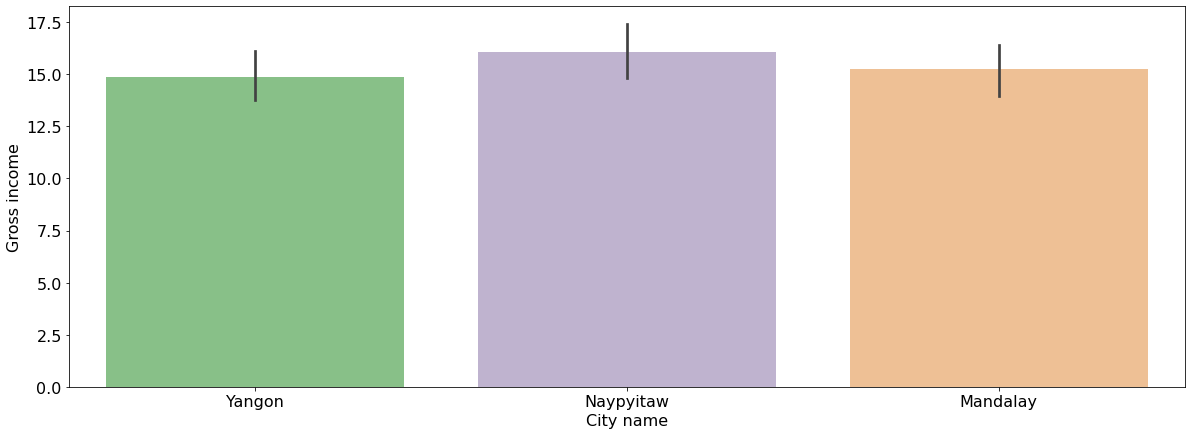

In [ ]:
#Which city should be chosen for expansion and which products should it focus on?
plt.figure(figsize=(20,7))
sns.barplot(data['City'],data['gross income'],palette='Accent')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.show()

t is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.

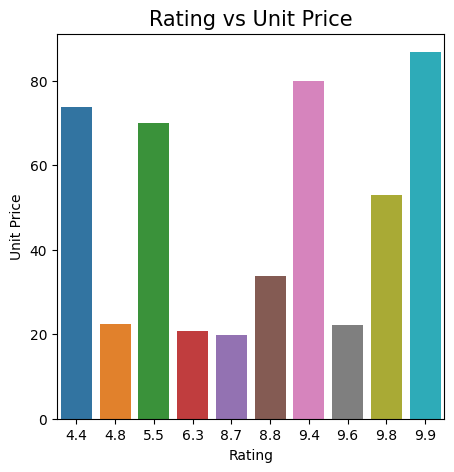

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=data[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

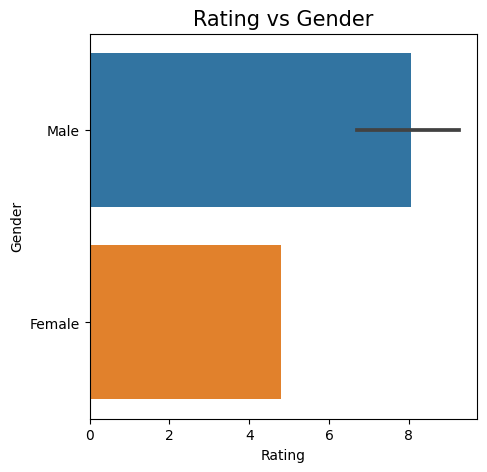

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=data[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

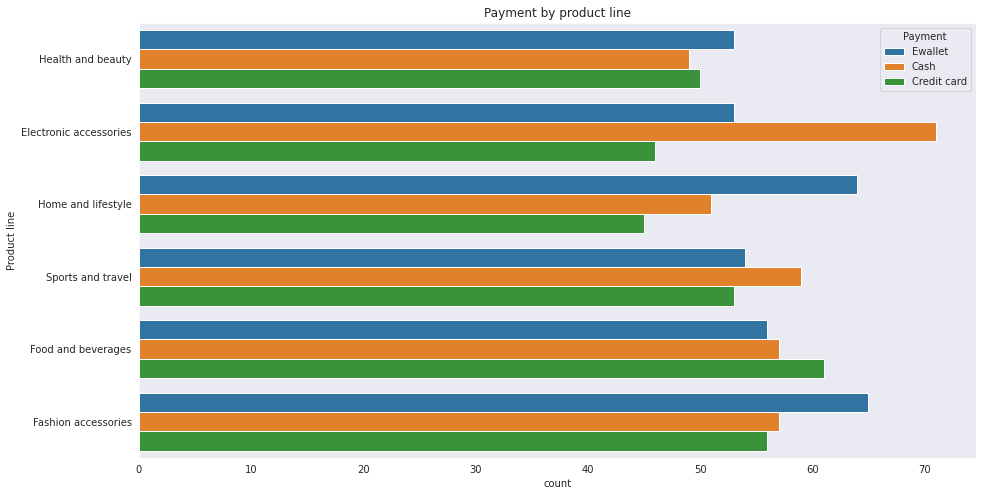

In [ ]:


plt.figure(figsize=(15,8))
plt.title('Payment by product line')

sns.countplot(y= 'Product line', hue='Payment',data=data)
plt.show()

Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.

#what is the distribution of customer type for each Gender


In [ ]:
pd.pivot_table(data, index = 'Customer type' , values = 'Invoice ID' , columns = 'Gender' , aggfunc = 'count')

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


Most of the Females have membership card.

Customer type basis on Product line?

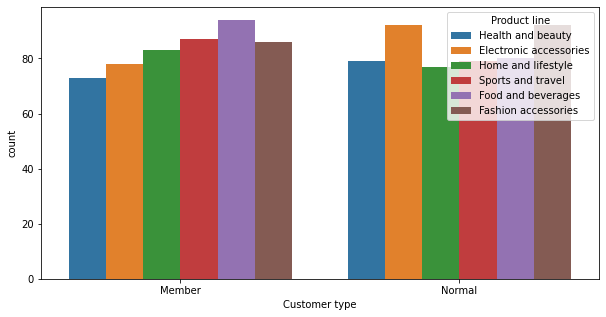

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Customer type'],hue=data['Product line'])
plt.show()

In [ ]:
pd.pivot_table(data , index = 'Customer type' , values = 'Invoice ID' , columns = 'Product line' , aggfunc = 'count')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,78,86,94,73,83,87
Normal,92,92,80,79,77,79


Customers with membership card are buying more products from Food and beverages and Non-membership customers are buying more products from Electronic accessories

Which Branch has highest gross income?


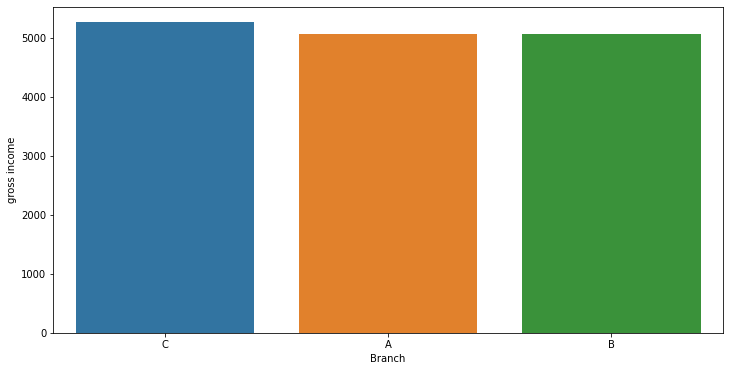

In [ ]:
branch=data[["Branch", "gross income"]].groupby(['Branch'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Branch', y='gross income',data=branch)
plt.show()

Branch C has highest gross income.

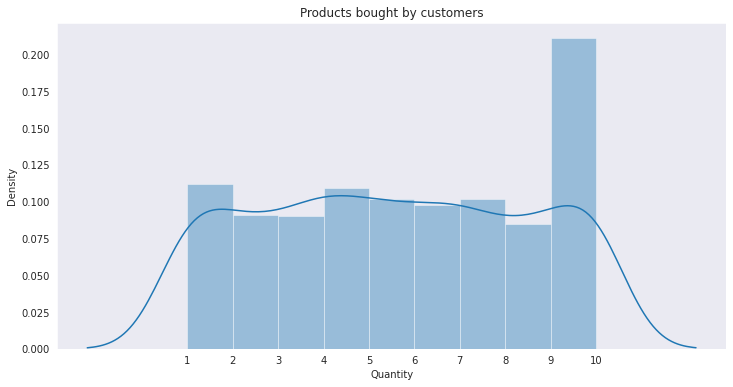

In [ ]:
plt.figure(figsize = (12,6))
x_ticks = [1,2,3,4,5,6,7,8,9,10]
sns.distplot(data.Quantity).set_title('Products bought by customers')
plt.xticks(x_ticks)
plt.show()

Product sales on the basis of gender

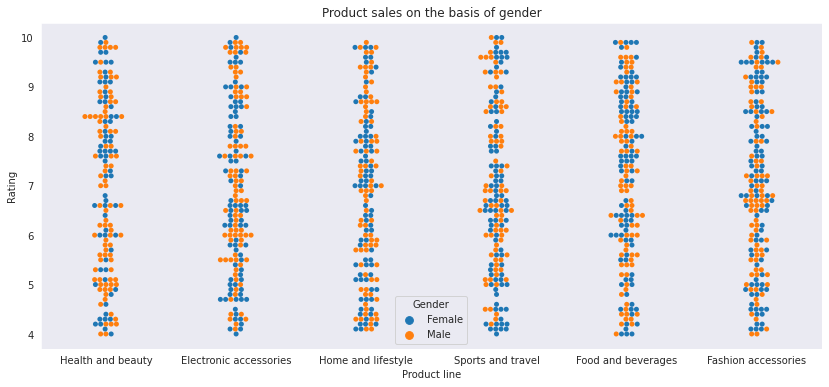

In [ ]:
plt.figure(figsize=(14,6))
sns.swarmplot(x= "Product line", y = "Rating", hue = "Gender", data = data).set_title("Product sales on the basis of gender")
plt.show()

In [ ]:
data.groupby('Product line')['Gender'].value_counts()

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

Fashion accessories, Food and beverages are the most bought products by Female customers. Electronic accessories, Health and beauty are the most bought products by Male customers.

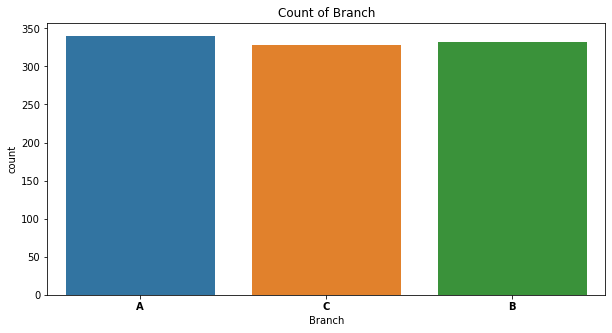

In [ ]:
#Is there any difference in aggregate sales across branches?
plt.figure(figsize=(10,5))
sns.countplot(data.Branch).set_title("Count of Branch")
plt.xticks(fontsize=10,fontweight='bold')
plt.show()

In [ ]:
data.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A(i.e, Yangon city) is a bit higher than the rest of the branches.

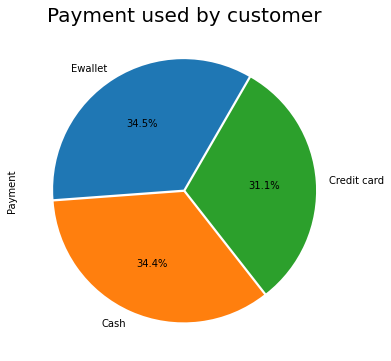

In [ ]:
#Which is the most pouplar payment method used by customers?
plt.figure(figsize=(6,6))
data['Payment'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

The most popular payment method is EWallet.

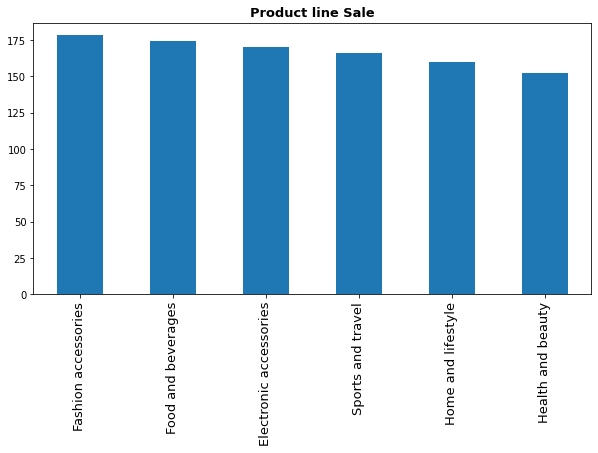

In [ ]:
 #Which product line has more sale ?
 plt.figure(figsize=(10,5))
data['Product line'].value_counts().plot.bar().set_title("Product line Sale",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
data.groupby('Product line')['Product line'].count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Product line, dtype: int64

Fashion accessories & Food and beverages sales are bit higher than the rest of the product lines.

In [ ]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [ ]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


Applying Machine Learning Mechanism of K NN Classifiers, GradientBoostingClassifier ,Random Forest Classifier on Selective features of the dataset

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [ ]:
y=data['Gender']
x=data.drop('Gender',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       100
           1       0.48      0.47      0.48       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[50 50]
 [53 47]]
Training Score:
 88.0


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,0
859,0,0
298,1,1
553,1,0
672,0,0
...,...,...
679,1,0
722,1,1
215,1,1
653,1,1


Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.48      0.47      0.47       100
           1       0.48      0.49      0.49       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[47 53]
 [51 49]]
Training Score:
 100.0


In [ ]:
#Individual correlations
round(np.corrcoef(data['gross income'], data['Rating'])[1][0],2)

-0.04

Building a linear Regression Model using statsmodel package

In [ ]:
# data type conversion
from sklearn.preprocessing import LabelEncoder
# re processing the data
from sklearn.preprocessing import StandardScaler
# Splitting the data
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.cluster import KMeans

In [ ]:
#Lets assign feature variable 'Daily time spent' as X and our target variable 'daily Internet Usage' as Y
# X - independent variable
# Y - target varaible

In [ ]:
# creating X and Y

X = data['gross income']
Y = data['Tax 5%']

In [ ]:
# creating training and testing datasets

from sklearn .model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# taking a look at the training and testing datasets
print(X_train)
print(Y_train)

420     5.7900
278    35.4950
218    37.9480
363    21.9660
850     3.7050
        ...   
855    16.4295
871     2.8250
835     2.6190
792    48.6850
520     6.8565
Name: gross income, Length: 700, dtype: float64
420     5.7900
278    35.4950
218    37.9480
363    21.9660
850     3.7050
        ...   
855    16.4295
871     2.8250
835     2.6190
792    48.6850
520     6.8565
Name: Tax 5%, Length: 700, dtype: float64


In [ ]:
# Building a linear regression model using statsmodel package

#Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS'(Ordinary Least Square)
linear_regression = sm.OLS(Y_train, X_train_sm).fit()

#printing the parameters
linear_regression.params

const          -4.087009e-15
gross income    1.000000e+00
dtype: float64

# from the above parameters, we get the values of intercept and slope for the straight line

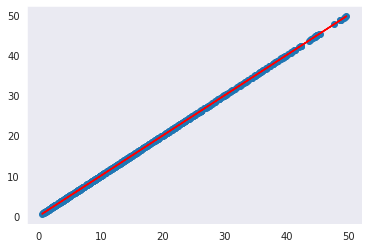

In [ ]:
#Visualizing the regression line

plt.scatter(X_train, Y_train)
plt.plot(X_train, -4.087009e-15+1.000000e+00 * X_train, 'r')
plt.show()

In [ ]:
# predicting the y_value using training data of X
Y_train_prediction = linear_regression.predict(X_train_sm)

# creating residuals from the y_train data and predicted y_data

residuals = (Y_train - Y_train_prediction)

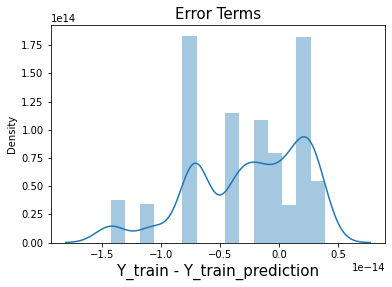

In [ ]:
#Plotting the histogramm of the residual values

figure = plt.figure()

sns.distplot(residuals, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_prediction', fontsize = 15)
plt.show()

In [ ]:
#Evaluating the  model

# adding constant to the X_test to get the intercept
X_test_sm = sm.add_constant(X_test)

#predicting the Y values corresponding to the X_test_sm
Y_test_prediction = linear_regression.predict(X_test_sm)

#displaying the first 15 predicted values
Y_test_prediction

249    25.5710
353    12.1500
537     4.8970
424     0.8140
564     9.9250
        ...   
193     5.1100
838    27.9350
974     8.6130
203    12.9500
425    18.2745
Length: 300, dtype: float64

In [ ]:
from sklearn.metrics import r2_score

# checking the R-squared value for predicted Y values
r_squared = r2_score(Y_test, Y_test_prediction)
print("R-squared value : ",r_squared)

R-squared value :  1.0



Since, the r-squared value on test data is within 5% of the r-squared value of the training data, we can conclude that the model is pretty stable

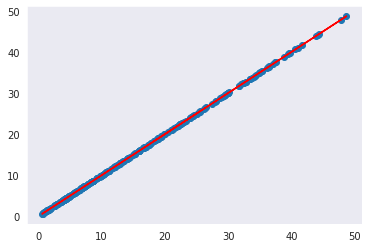

In [ ]:
#visualizing the line on the testing dataset

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_prediction, 'r')
plt.show()

In [ ]:
# Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split

X_train_lm, X_test_lm, Y_train_lm, Y_test_lm = train_test_split(X, Y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 100)


In [ ]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(700, 1)
(300, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
linear_regression_model = LinearRegression()

# Fit the model using .fit() method
linear_regression_model.fit(X_train_lm, Y_train_lm)

LinearRegression()

In [ ]:
# Intercept value
print("Intercept :",linear_regression_model.intercept_)

# Slope value
print('Slope :',linear_regression_model.coef_)

Intercept : 0.0
Slope : [1.]
